In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
import ptitprince as pt
import seaborn as sns
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.d04_wrangling.add_ppt_info import *
from src.d01_data.fetch.group_conditions import group_conditions

        ppt_id  n_trials  n_correct  p_correct  mean_confidence    hn_enc  \
0    alloeye_8      67.0       35.0   0.524242         6.722222  0.488315   
1   alloeye_97      67.0       57.0   0.845202         8.684091  0.664293   
2   alloeye_68      54.0       22.0   0.407407         6.407407  0.606845   
3   alloeye_50      67.0       41.0   0.604293         5.961616  0.828497   
4    alloeye_6      67.0       29.0   0.430303         5.333333  0.656091   
..         ...       ...        ...        ...              ...       ...   
77  alloeye_32      54.0       32.0   0.592593         4.666667  0.782679   
78  alloeye_42      67.0       28.0   0.413384         4.250253  0.535125   
79  alloeye_45      54.0       23.0   0.425926         5.648148  0.936167   
80  alloeye_33      54.0       34.0   0.629630         5.425926  0.904765   
81  alloeye_24      67.0       47.0   0.696212         8.104798  0.777245   

      hd_enc    ht_enc  hn_s_enc  hd_s_enc  ...  gauss_dwell_pp_diff  \
0  

C:\Users\Luke Emrich-Mills\OneDrive\Documents\PhD\AlloEye\data_pipeline\src\d01_data\fetch\group_conditions.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(query, conn)


# load and wrangle

C:\Users\Luke Emrich-Mills\OneDrive\Documents\PhD\AlloEye\data_pipeline\src\d01_data\fetch\group_conditions.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(query, conn)


(82, 285)
(81, 285)


C:\Users\Luke Emrich-Mills\AppData\Local\Temp\ipykernel_14832\416672963.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][nas] = np.nan
C:\Users\Luke Emrich-Mills\AppData\Local\Temp\ipykernel_14832\416672963.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][nas] = np.nan
C:\Users\Luke Emrich-Mills\AppData\Local\Temp\ipykernel_14832\416672963.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][nas] = np

(81, 193)
['MCI+' 'MCI-' 'MCIu' 'O' 'Y']


,n,female_p,age,yoe,NART
group,,,,,
MCI+,5,0.20,69.57,14.25,42.25
MCI-,6,0.17,67.12,13.67,35.00
MCIu,2,0.50,73.81,16.50,41.50
O,31,0.58,71.69,15.38,39.91
Y,37,0.59,23.86,16.06,30.59


[37, 31, 2, 6, 5]
[0.5945945945945946, 0.5806451612903226, 0.5, 0.16666666666666666, 0.2]
[23.85968585482759, 71.6894781652, 73.80698152, 67.120731235, 69.57143908249999]
[16.055555555555557, 15.375, 16.5, 13.666666666666666, 14.25]
[30.59259259259259, 39.91304347826087, 41.5, 35.0, 42.25]


C:\Users\Luke Emrich-Mills\AppData\Local\Temp\ipykernel_14832\416672963.py:232: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(x, fontsize=8)


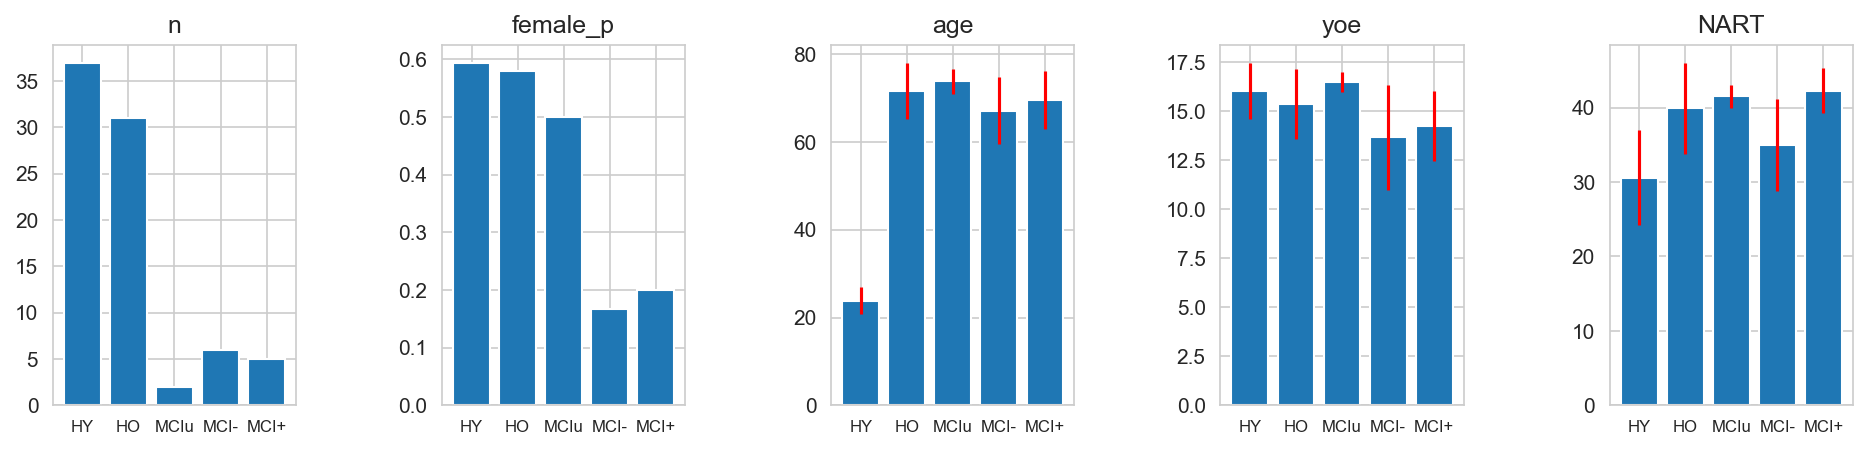

In [5]:

dwellT_nfixF = False   # shouldn't use both dwell and n/p fix because highly collinear
HnT_dF = False
include_both = True
# file_loc = "C:\\Users\\Luke\\Documents\\AlloEye\\data\\feature_saves\\sm_human_public_alloeye_conditions.csv"
# df = pd.read_csv(file_loc)


df = group_conditions()
df = add_ppt_info(df)

# print([col for col in df.columns])

# display(df[df.group == 'MCI+'].style)

# wrangle some columns
def drop_col_with(df, string):
    for col in df.columns:
        if string in col:
            df = df.drop([col], axis=1)
    return df

df = drop_col_with(df, 'Unnamed')
print(df.shape)
df = df[df['NP test date'] != 'EXCLUDED']
print(df.shape)
drop_cols = ['n_correct', 'n_trials', 'biomarkers', 'pupil_diam_centre_enc', 'pupil_diam_centre_ret',
            'pupil_diam_spread_ret', 'pupil_diam_spread_enc',
            'VR test date', 'VR tester', 'NP test date', 'NP tester', 'english',
             'handedness', 'Rey Immediate', 'distance_pp_median_enc', 'distance_pp_median_diff',
             'gauss_dwell_pp_enc', 'gauss_dwell_pp_diff', 'n_refix_pp_enc', 'redwell_pp_enc', 'n_refix_pp_diff', 'redwell_pp_diff']
df = df.drop(drop_cols, axis=1)

# drop entropy
e_drop = 'hd' if HnT_dF else 'hn'
df = drop_col_with(df, e_drop)

# remove sacc for now
df = drop_col_with(df, 'sacc')

# # remove velocity for now
df = drop_col_with(df, 'velocity_std')

# remove drop out for now
df = drop_col_with(df, 'drop_out')

# dwell comparison
df['dwell_notMoved_enc'] = df['dwell_obj2_enc'] + df['dwell_obj3_enc'] + df['dwell_obj4_enc']
df['dwell_notMoved_ret'] =  df['dwell_obj2_ret'] + df['dwell_obj3_ret'] + df['dwell_obj4_ret']
df['redwell_notMoved_enc'] = df['redwell_obj2_enc'] + df['redwell_obj3_enc'] + df['redwell_obj4_enc']
df['redwell_notMoved_ret'] =  df['redwell_obj2_ret'] + df['redwell_obj3_ret'] + df['redwell_obj4_ret']
df['refix_notMoved_enc'] =  df['n_refix_obj2_enc'] + df['n_refix_obj3_enc'] + df['n_refix_obj4_enc']
df['refix_notMoved_ret'] =  df['n_refix_obj2_ret'] + df['n_refix_obj3_ret'] + df['n_refix_obj4_ret']
df['dwell_MOminusSOs_enc'] = df['dwell_obj1_enc'] - df['dwell_notMoved_enc']
df['dwell_MOminusSOs_ret'] = df['dwell_obj1_ret'] - df['dwell_notMoved_ret']

df['dwell_MOminusTable_ret'] = df['dwell_obj1_ret'] - df['dwell_table_ret']
df['dwell_array_enc'] = df['dwell_obj1_enc'] + df['dwell_notMoved_enc']
df['dwell_array_ret'] = df['dwell_obj1_ret'] + df['dwell_notMoved_ret']

# dwell time as proportion
for col in df.columns:
    if 'dwell' in col and 'total' not in col and 'gini' not in col and 'gauss' not in col:
        if 'ret' in col:
            df[col] /= df['dwell_total_ret']
        else:
            df[col] /= df['dwell_total_enc']

df['gauss_dwell_pp_ret'] /= 7200


df['dwell_MOSOs_ratio_ret'] = df['dwell_obj1_ret'] / df['dwell_notMoved_ret']
df['dwell_MOSOs_logratio_ret'] = np.log(df['dwell_MOSOs_ratio_ret'])

df['dwell_tableobjs_ratio_enc'] = df['dwell_table_enc'] / (df['dwell_obj1_enc'] + df['dwell_notMoved_enc'])
df['dwell_tableobjs_logratio_enc'] = np.log(df['dwell_tableobjs_ratio_enc'])
df['dwell_tableSOs_ratio_ret'] = df['dwell_table_ret'] / df['dwell_notMoved_ret']

df['dwell_MOtabletoSOs_ratio_enc'] = (df['dwell_obj1_enc'] + df['dwell_table_enc'] ) / df['dwell_notMoved_enc']
df['dwell_MOtabletoSOs_ratio_ret'] = (df['dwell_obj1_ret'] + df['dwell_table_ret'] ) / df['dwell_notMoved_ret']
df['redwell_MOtabletoSOs_ratio_enc'] = (df['redwell_obj1_enc'] + df['redwell_table_enc'] ) / df['redwell_notMoved_enc']
df['redwell_MOtabletoSOs_ratio_ret'] = (df['redwell_obj1_ret'] + df['redwell_table_ret'] ) / df['redwell_notMoved_ret']
df['dwell_MOtabletoSOs_logratio_enc'] = np.log(df['dwell_MOtabletoSOs_ratio_enc'])
df['dwell_MOtabletoSOs_logratio_ret'] = np.log(df['dwell_MOtabletoSOs_ratio_ret'])
df['redwell_MOtabletoSOs_logratio_ret'] = np.log(df['redwell_MOtabletoSOs_ratio_ret'])
df['redwell_MOtabletoSOs_logratio_enc'] = np.log(df['redwell_MOtabletoSOs_ratio_enc'])
df['refix_MOtabletoSOs_ratio_ret'] = (df['n_refix_obj1_ret'] + df['n_refix_table_ret'] ) / df['refix_notMoved_ret']
df['refix_MOtabletoSOs_logratio_ret'] = np.log(df['refix_MOtabletoSOs_ratio_ret'])
df['dwell_MOtabletoSOs_logratio_diff'] = df['dwell_MOtabletoSOs_logratio_ret'] - df['dwell_MOtabletoSOs_logratio_enc']
df['redwell_MOtabletoSOs_logratio_diff'] = df['redwell_MOtabletoSOs_logratio_ret'] - df['redwell_MOtabletoSOs_logratio_enc']

df['dwell_MOPPtabletoSOs_ratio_ret'] = (df['dwell_obj1_ret'] + df['dwell_table_ret'] + df['dwell_pp_ret'] ) / df['dwell_notMoved_ret']
df['dwell_relevant_ratio_ret'] = (df['dwell_obj1_ret'] + df['dwell_table_ret']  ) / (df['dwell_notMoved_ret'] + df['dwell_other_ret'])
df['dwell_relevant_logratio_ret'] = np.log(df['dwell_relevant_ratio_ret'])
df['dwell_tableirrelevant_ratio_ret'] = (df['dwell_table_ret']  ) / (df['dwell_notMoved_ret'] + df['dwell_other_ret'])
df['dwell_tableirrelevant_logratio_ret'] = np.log(df['dwell_tableirrelevant_ratio_ret'])


df['dwell_tableSOs_logratio_ret'] = np.log(df['dwell_tableSOs_ratio_ret'])
df['dwell_MOPPtabletoSOs_logratio_ret'] = np.log(df['dwell_MOPPtabletoSOs_ratio_ret'])



df['dwell_odds_obj1_ret'] = df['dwell_obj1_ret']/(df['dwell_total_ret'] - df['dwell_obj1_ret'])
df['dwell_odds_table_ret'] = df['dwell_table_ret']/(df['dwell_total_ret'] - df['dwell_table_ret'])
df['dwell_logodds_obj1_ret'] = np.log(df['dwell_odds_obj1_ret'])
df['dwell_logodds_table_ret'] = np.log(df['dwell_odds_table_ret'])
df['dwell_tablearray_ratio_ret'] = df['dwell_table_ret'] / df['dwell_array_ret']
df['dwell_tablearray_logratio_ret'] = np.log(df['dwell_tablearray_ratio_ret'] )
df['dwell_tablearray_ratio_enc'] = df['dwell_table_enc'] / df['dwell_array_enc']
df['dwell_tablearray_logratio_enc'] = np.log(df['dwell_tablearray_ratio_enc'] )
df['dwell_obj1table_logOR_ret'] = np.log(df['dwell_odds_obj1_ret'] / df['dwell_odds_table_ret'])

# df['dwell_MOdivSOs_ret'] = df['dwell_obj1_ret'] / (df['dwell_obj2_ret'] - df['dwell_obj3_ret'] - df['dwell_obj4_ret'])
# df['dwell_MOdivSOs_ret'] = np.clip(df['dwell_MOdivSOs_ret'], np.nanmean(df['dwell_MOdivSOs_ret']) - np.nanstd(df['dwell_MOdivSOs_ret']),
#                                    np.nanmean(df['dwell_MOdivSOs_ret']) + np.nanstd(df['dwell_MOdivSOs_ret']))
# df['dwell_SOdivMOs_ret'] = (df['dwell_obj2_ret'] - df['dwell_obj3_ret'] - df['dwell_obj4_ret']) / df['dwell_obj1_ret']
# df['dwell_MOvsSOs_diff'] = df['dwell_MOvsSOs_ret'] - df['dwell_MOvsSOs_enc']
# df = df.drop(['dwell_MOvsSOs_enc'], axis=1)
# df['dwell_MOret_v_Os_er'] = df['dwell_MO-SOs_ret'] - df['dwell_obj1_enc'] - df['dwell_obj2_enc'] - df['dwell_obj3_enc'] - df['dwell_obj4_enc']
# df['dwell_MO-meanSOs_enc'] = df['dwell_obj1_enc'] - np.nanmean(df.loc[:, ['dwell_obj2_enc', 'dwell_obj3_enc', 'dwell_obj4_enc']], axis=1)
# df['dwell_MO-meanSOs_ret'] = df['dwell_obj1_ret'] - np.nanmean(df.loc[:, ['dwell_obj2_ret', 'dwell_obj3_ret', 'dwell_obj4_ret']], axis=1)
# df['dwell_MO-meanSOs_diff'] = df['dwell_MO-meanSOs_ret'] - df['dwell_MO-meanSOs_enc']
# df['dwell_MO-table_ret'] = df['dwell_obj1_ret'] - df['dwell_table_ret']
# df['dwell_Os_v_table_ret'] = df['dwell_obj1_ret'] + df['dwell_obj2_ret'] + df['dwell_obj3_ret'] + df['dwell_obj4_ret'] - df['dwell_table_ret']
# df['dwell_Os_v_table_diff'] = df['dwell_Os_v_table_ret'] - (df['dwell_obj1_enc'] + df['dwell_obj2_enc'] + df['dwell_obj3_enc'] + df['dwell_obj4_enc'] - df['dwell_table_enc'])

# drop obj2-4 cols
for col in df.columns:
    if'obj' in col:
        if '2' in col or '3' in col or '4' in col:
            df = df.drop([col], axis=1)

# p fixations - NEED TO DEAL WITH INFINITIES CAUSED BY DIFF - DIVIDING BY 0
for col in df.columns:
    if 'n_fix' in col and 'total' not in col and 'diff' not in col:
        rem = col.split('n_fix')[-1]
        view = rem.split('_')[-1]
        new_col = 'p_fix'+rem
        total = 'n_fix_total_'+view
        df[new_col] = df[col] / df[total]
        df = df.drop([col], axis=1)
for col in df.columns:
    if 'n_fix' in col and 'total' in col:
        df = df.drop([col], axis=1)



# df = drop_col_with(df, 'dwell_total')

# sort 4MT
first_col = 0
col_saved = False
for col in df.columns:
    if '4MT' in col:
        nas = pd.isna(df[col])
        # print(sum(nas))
        if 'RT' not in col:
            df[col] = np.where(df[col] == 'CORRECT', 1, 0)
            if col_saved is False:
                first_col = df.columns.get_loc(col)
                col_saved = True
        df[col][nas] = np.nan
df['4MT'] = df.iloc[:, first_col:first_col+15].sum(axis=1)
df = drop_col_with(df, '4MT_T')

df = drop_col_with(df, '4MT')

# neuropsych wrangling
# df['FCSRT_FR_I'] = df['FCSRT T1 FR'] + df['FCSRT T2 FR'] + df['FCSRT T3 FR']
# df['FCSRT_TR_I'] = df['FCSRT T1 TR'] + df['FCSRT T2 TR'] + df['FCSRT T3 TR']
df = drop_col_with(df, 'FCSRT T')

# choose either dwell or p fix
if dwellT_nfixF is True and include_both is False:
    df = drop_col_with(df, 'fix')
elif include_both is False:
    df = drop_col_with(df, 'dwell')
else:
    pass


# descriptive statistics
df_copy = df.copy(deep=True)
# remove exclusions
print(df.shape)
# control_ace_cutoff = (((df['ACE-III_total'] > 88) | pd.isna(df['ACE-III_total']))
#                       &  (df['group'] == '')) | (df['group'] == 'P')
# yoe_cutoff = (((df['yoe'] <= 17) | pd.isna(df['yoe']))
#                       &  (df['group'] != 'P')) | (df['group'] == 'P')
# df = df[control_ace_cutoff]
# df = df[yoe_cutoff]

# display(df[df.group == 'O'].style)

df['f_bool'] = np.where(df.sex == 'f', 1, 0)
print(np.unique(df.group))
groupby_group = df.groupby(by='group')
# print(np.unique(df.ppt_id))
ds = pd.DataFrame()
ds['n'] =  groupby_group.nunique().ppt_id
ds['female_p'] =  groupby_group.sum().f_bool / groupby_group.count().ppt_id
mean_cols = ['age', 'yoe','NART']
ace_cols = ['ACE-III_attention', 'ACE-III_verbalfluency',
            'ACE-III_language', 'ACE-III_visuospatial',
            'ACE-III_perceptual', 'ACE-III_memory', 'ACE-III_total']
for col in mean_cols:
    ds[col] = groupby_group.agg({col: np.nanmean})

display(ds.style.format(precision=2))

n_cols = len(ds.columns)

fig, axes = plt.subplots(1, n_cols, figsize=(15, 3), dpi=150)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.6,
                    hspace=0.6)
g = ['Y', 'O', 'MCIu', 'MCI-', 'MCI+']
x = ["HY", "HO", "MCIu", "MCI-", "MCI+"]
for i in range(n_cols):
    feat = ds.columns[i]
    y = [ds[feat][4], ds[feat][3], ds[feat][2], ds[feat][1], ds[feat][0]]
    print(y)
    axes[i].bar(x, y)
    if i > 1:  # skip n and p_female
        # print(df[feat])
        # err = [stats.sem(df[df.group == g[j]][feat]) for j in range(len(x))]
        err = [np.nanstd(df[df.group == g[j]][feat]) for j in range(len(x))]
        axes[i].errorbar(x, y, yerr=err, fmt='none', color="r")
    axes[i].set_xticklabels(x, fontsize=8)

    axes[i].set_title(feat)

drop_cols = mean_cols.extend(['sex', 'f_bool'])
df = df.drop(mean_cols, axis=1)
df = df.drop(ace_cols, axis=1)

# display(df.head(5).style)

# space to plot basic charts

0.12813029022729613


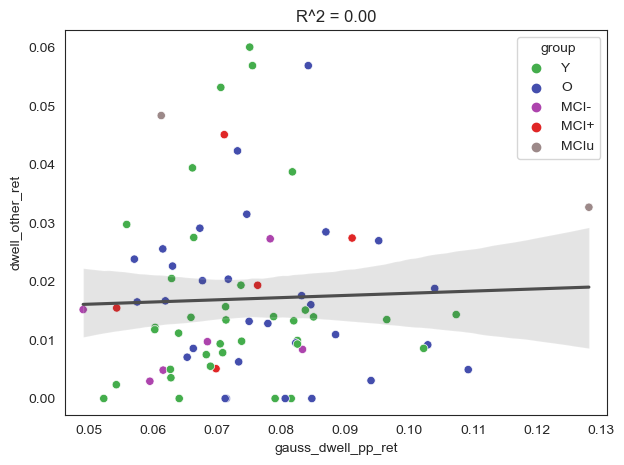

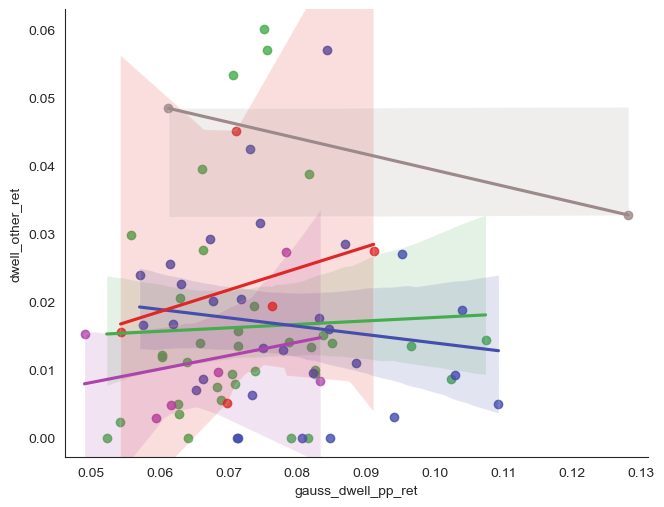

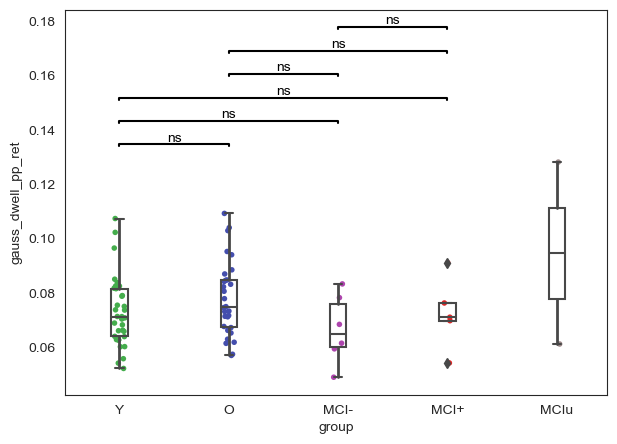

0.06014065152372484


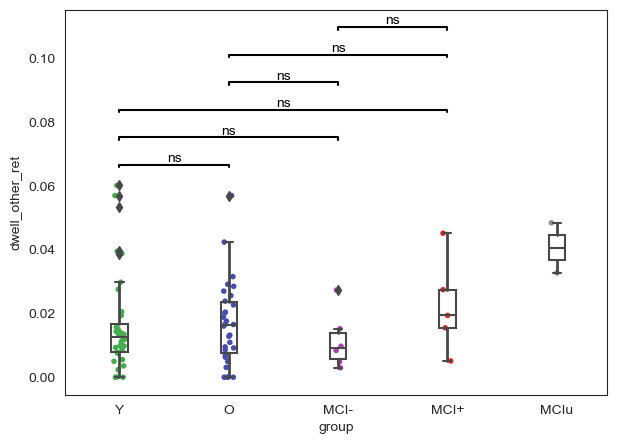

In [39]:
#
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind

# Create a custom color palette
custom_palette = sns.color_palette(["#44ad4c", "#444ead", "#ad44ad", "#e02626", "#9c8989"])
sns.set_palette(custom_palette)


df['conf*perf'] = ((df['mean_confidence'] - np.nanmean(df.mean_confidence))/np.nanstd(df.mean_confidence)) * \
                  ((df['p_correct'] - np.nanmean(df.p_correct))/np.nanstd(df.p_correct))
cols_to_log = ['dwell_table_enc', 'dwell_table_ret']
for col in cols_to_log:
    df[f"{col}_log"] = np.log2(df[col] + 0.5)

df['ht_comb'] = df['ht_enc'] + df['ht_ret']
df['dwell_table_comb'] = df['dwell_table_enc'] + df['dwell_table_ret']

# df['dwell_array_enc']
df['dwell_tablearray_ratio_enc'] = df['dwell_table_enc'] / df['dwell_array_enc']
df['dwell_tablearray_logratio_enc'] = np.log(df['dwell_tablearray_ratio_enc'] )

def add_stat_annotation(ax, data, group_col, value_col, box_pairs):
    y_max = np.max(data[value_col])
    print(y_max)
    y_sd = np.std(data[value_col])
    y_min = -1
    y_range = y_max - y_min
    for p, pair in enumerate(box_pairs):
        g1, g2 = pair
        group1, group2 = group_plot_order()[g1], group_plot_order()[g2]
        value_group1 = data[data[group_col] == group1][value_col].dropna()
        value_group2 = data[data[group_col] == group2][value_col].dropna()
        # perform t-test
        t_stat, p_val = ttest_ind(value_group1, value_group2)
        if p_val < 0.05:
            p_text = "*"
        elif p_val < 0.01:
            p_text = "**"
        elif p_val < 0.001:
            p_text = "***"
        else:
            p_text = "ns"
        # draw line and text
        x1 = np.where(ax.get_xticks() == g1)[0][0]
        x2 = np.where(ax.get_xticks() == g2)[0][0]
        y = y_max + (y_sd * 1) + (0.6*(p-1)*y_sd)
        line_x, line_y = [x1, x1, x2, x2], [y, y + (y_sd * 0.05), y + (y_sd * 0.05), y]
        ax.plot(line_x, line_y, lw=1.5, c='black')
        ax.text((x1 + x2) * .5, y + (y_sd * 0.05), p_text, ha='center', va='bottom', color='black')

# dwell_MOSOs_logratio_ret
# dwell_MOtabletoSOs_logratio_ret
f, ax = plt.subplots(figsize=(7, 5))

replace_map = {'P': 0, 'O': 1, 'Y': 2}
y_c = df['group'].replace(replace_map)
x_col = 'gauss_dwell_pp_ret'
y_col = 'dwell_other_ret'
# CALCULATE MEAN OF LOG OF DWELL TABLE
sns.set_style('white')
sns.scatterplot(data=df, x=x_col, y=y_col, hue='group', alpha=1, ax=ax, hue_order=group_plot_order())

sns.regplot(data=df, x=x_col, y=y_col, ax=ax, scatter_kws={'alpha':0.0}, line_kws={'color': [0.3, 0.3, 0.3]})

# Fit a linear regression model
data = df.dropna(subset=[x_col, y_col])
reg = LinearRegression().fit(data[[x_col]], data[y_col])
r2 = r2_score(data[y_col],  reg.predict(data[[x_col]]))
plt.title(f"R^2 = {r2:.2f}")
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax_lim_space_scalar = 0.2
ax.set_xlim([np.min(data[x_col]) - (ax_lim_space_scalar * np.std(data[x_col])),
             np.max(data[x_col]) + (ax_lim_space_scalar * np.std(data[x_col]))])
ax.set_ylim([np.min(data[y_col]) - (ax_lim_space_scalar * np.std(data[y_col])),
             np.max(data[y_col]) + (ax_lim_space_scalar * np.std(data[y_col]))])


sns.lmplot(data=df, x=x_col, y=y_col, hue='group', legend=False, aspect =1.3, hue_order=group_plot_order())
plt.xlim([np.min(data[x_col]) - (ax_lim_space_scalar * np.std(data[x_col])),
             np.max(data[x_col]) + (ax_lim_space_scalar * np.std(data[x_col]))])
plt.ylim([np.min(data[y_col]) - (ax_lim_space_scalar * np.std(data[y_col])),
             np.max(data[y_col]) + (ax_lim_space_scalar * np.std(data[y_col]))])

box_pairs = [(0, 1), (0, 2), (0, 3),
             (1, 2), (1, 3), (2, 3)]

# zcol = 'p_correct'
# ax = plt.figure().add_subplot(111, projection='3d')
# ax.scatter(df[x_col], df[y_col], df[zcol], c=y)

# ax = plt.figure().add_subplot()
# ax.hist(df[x_col])
rain_size = 4
jitter= 0.05
cloud_alpha = 0.0
# Initialize figure and ax
f, ax = plt.subplots(figsize=(7, 5))

# Create the raincloud plot
pt.RainCloud(y=x_col, x='group', palette=custom_palette, data=df, bw=0.01, point_size=rain_size,
             width_viol=.0, ax=ax, orient='v', pointplot=False, order=group_plot_order(), jitter=jitter, alpha=cloud_alpha)
add_stat_annotation(ax, df, 'group', x_col, box_pairs)
# ax.set_ylabel("Proportion of Correct Trials")

# Show the plot
plt.show()

# Initialize figure and ax
f, ax = plt.subplots(figsize=(7, 5))

# Create the raincloud plot
pt.RainCloud(y=y_col, x='group', palette=custom_palette, data=df,  bw=.01, point_size=rain_size,
             width_viol=.0, ax=ax, orient='v', pointplot=False, order=group_plot_order(), jitter=jitter,  alpha=cloud_alpha)
add_stat_annotation(ax, df, 'group', y_col, box_pairs)
# ax.set_ylabel("MultiMatch Vector")
# Show the plot
plt.show()

In [27]:
# more wrangling

from sklearn import preprocessing
columns = ['dwell_relevant_logratio_ret', 'dwell_table_ret', 'dwell_obj1_ret', 'gauss_dwell_pp_ret', 'dwell_other_ret', 'dwell_notMoved_ret', 'p_correct', 'ht_enc', 'ht_ret', 'mm_vector', 'd_kl']
columns = ['dwell_table_ret', 'dwell_table_enc', 'dwell_obj1_ret', 'gauss_dwell_pp_ret', 'dwell_other_ret', 'dwell_notMoved_ret', 'p_correct', 'mean_confidence', 'ht_enc', 'ht_ret', 'mm_vector']

columns = ['dwell_MOtabletoSOs_logratio_ret', 'p_correct', 'mean_confidence', 'ht_enc', 'ht_ret', 'mm_vector']
X = df[['ppt_id', 'group', *columns]]

X = X.drop(['ppt_id'], axis=1).dropna(thresh=5).reset_index(drop=True)
X = X[X.group != 'MCIu'].reset_index(drop=True)
replace_map = {'MCI+': 0, 'MCI-': 1, 'O': 2, 'Y': 3}
X['group'] = X['group'].replace(replace_map)

y = X['group'].to_numpy()
X = X.drop(['group'], axis=1)
X_cols = X.columns
print('X_cols', X_cols)

# replace with multiple imputation at some point
for col in X.columns:
    # print(col)
    X[col] = X[col].fillna(np.nanmean(X[col]))
    
Xs = preprocessing.StandardScaler().fit(X).transform(X)
Xs_df = pd.DataFrame(Xs, columns=X_cols)
Xs_df['group'] = y
noyoung = Xs_df['group'] != replace_map['Y']
Xs_df_noyoung = Xs_df[noyoung].reset_index(drop=True)
y_noyoung = Xs_df_noyoung['group'].to_numpy()
Xs_df_noyoung = Xs_df_noyoung.drop(['group'], axis=1)

Xsg = Xs_df.groupby(by='group').mean()
Xs_df = Xs_df.drop(['group'], axis=1)
# convert to absolute group differences
for col in Xsg.columns:
    try:
        Xsg[col][0] = np.abs(Xsg[col][0]  - Xsg[col][1])
        Xsg[col][1] = np.abs(Xsg[col][1] - Xsg[col][2])
        Xsg[col][2] = np.abs(Xsg[col][2] - Xsg[col][0])
    except (KeyError, IndexError) as e:
        # print("error")
        pass

Xsg.rename(index={0:'0-1', 1:'1-2', 2: '2-0'}, inplace=True)
# Xsg.style
print(len(X))
print(len(y))




X_cols Index(['dwell_MOtabletoSOs_logratio_ret', 'p_correct', 'mean_confidence',
       'ht_enc', 'ht_ret', 'mm_vector'],
      dtype='object')
77
77


# check collinearity

In [28]:
# heatmap correlation plot
corr = Xs_df.corr()
sort_corr = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()
print(sort_corr[:30])

dwell_MOtabletoSOs_logratio_ret  dwell_MOtabletoSOs_logratio_ret    1.000000
                                 mm_vector                          0.630851
p_correct                        dwell_MOtabletoSOs_logratio_ret    0.489387
mean_confidence                  p_correct                          0.405597
ht_enc                           ht_ret                             0.354001
mm_vector                        ht_enc                             0.264115
dwell_MOtabletoSOs_logratio_ret  mean_confidence                    0.259027
mm_vector                        p_correct                          0.228888
dwell_MOtabletoSOs_logratio_ret  ht_ret                             0.222036
mean_confidence                  ht_ret                             0.194037
p_correct                        ht_ret                             0.191199
mm_vector                        mean_confidence                    0.153404
dwell_MOtabletoSOs_logratio_ret  ht_enc                             0.094015

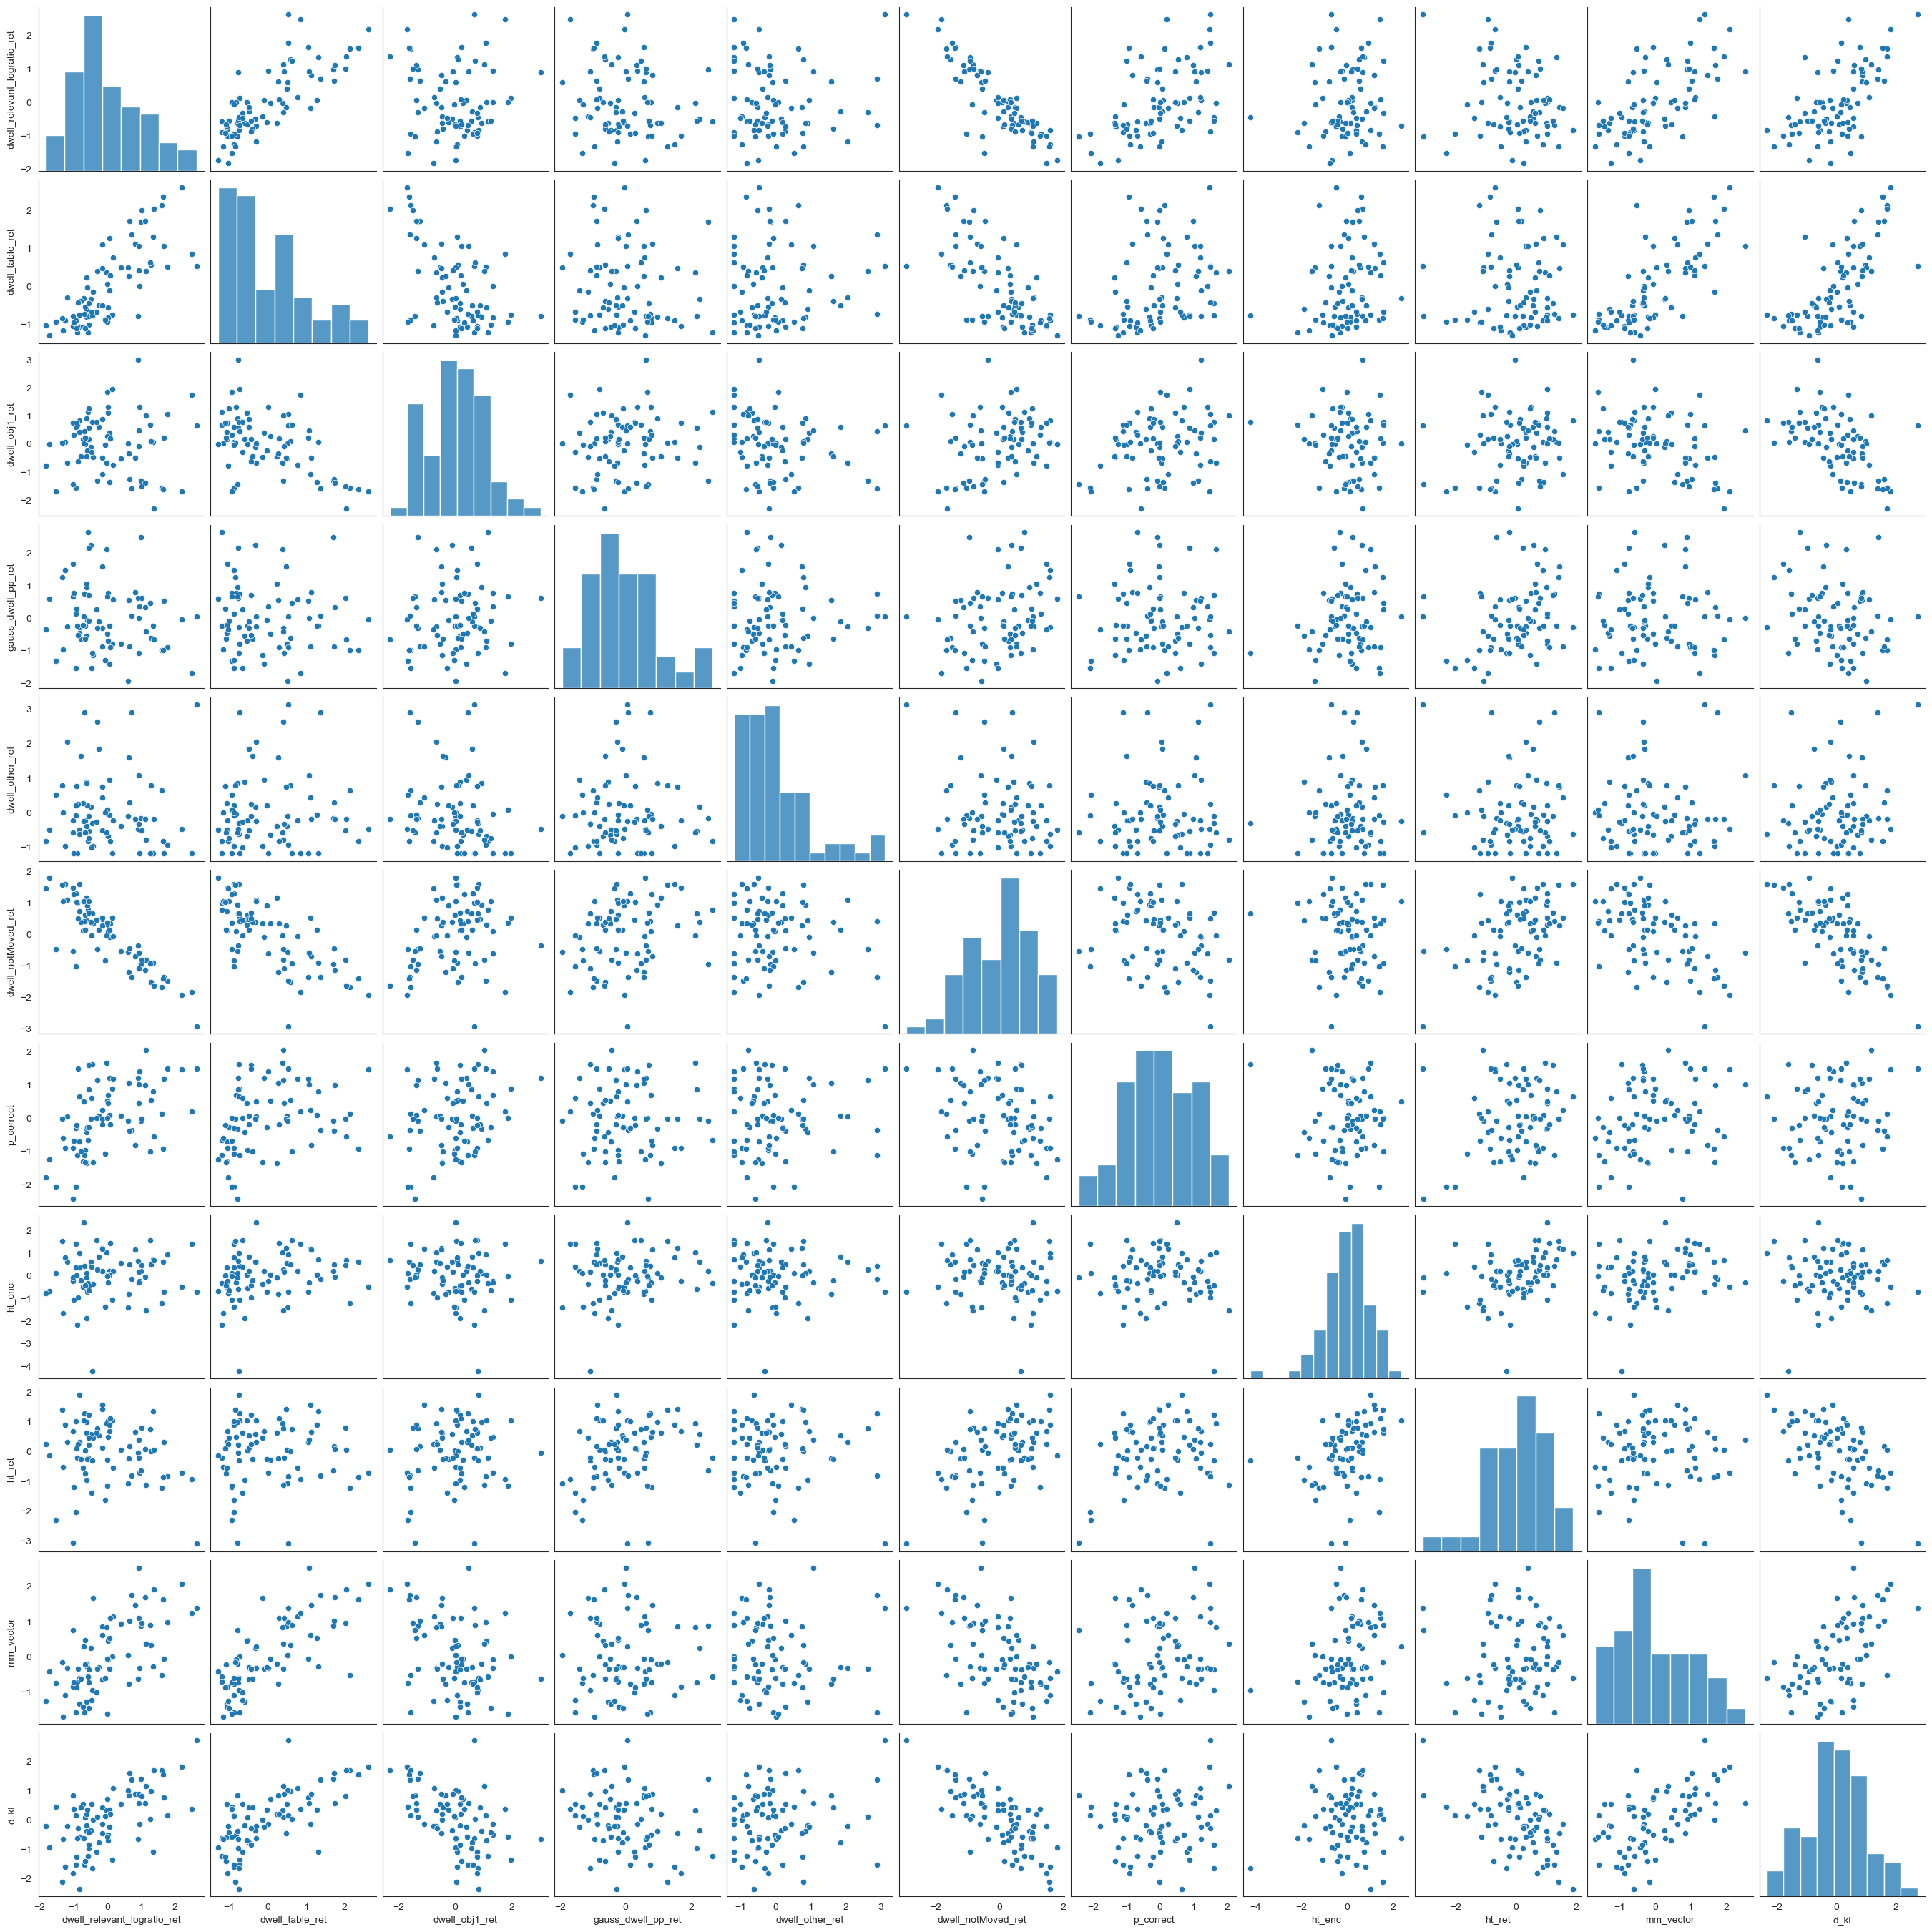

In [8]:
sns.pairplot(Xs_df)

# feature selection

In [21]:
# then filter those where mean diff between groups is very low, then plot remaining
es_filter = 0.5  # effect size filter
filtered_cols = []
for col in Xsg.columns:
    if np.sum(Xsg[col] > es_filter) > 0:
        filtered_cols.append(col)
print((filtered_cols))

['dwell_table_ret', 'dwell_table_enc', 'dwell_obj1_ret', 'gauss_dwell_pp_ret', 'dwell_other_ret', 'dwell_notMoved_ret', 'p_correct', 'mean_confidence', 'ht_enc', 'ht_ret', 'mm_vector']


In [22]:
# select by anova f-score threshold
# NOTE: can probably do this through sklearn using feature_selection.f_classif
p_thresh = 0.05
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
anova_filt_cols = []
# ANOVA
print("anova")
for col in Xs_df.columns:
    P = Xs_df[col][y == 0]
    O = Xs_df[col][y == 1]
    Y = Xs_df[col][y == 2]
    fvalue, pvalue = stats.f_oneway(P, O, Y)
    if pvalue < p_thresh:
        print(f"col: {col}, f: {fvalue:.3f}, p: {pvalue:.3f})")
        anova_filt_cols.append(col)
        
print("t-test")
p_thresh = 0.05
for col in Xs_df.columns:
    P = Xs_df[col][y == 0]
    O = Xs_df[col][y == 1]
    # Y = Xs_df[col][y == 2]
    tvalue, pvalue = stats.ttest_ind(P, O, nan_policy='omit', random_state=0)
    if pvalue < p_thresh:
        print(f"col: {col}, t: {tvalue:.3f}, p: {pvalue:.3f})")
        anova_filt_cols.append(col)

anova
t-test


In [52]:
# use sklearn feature selection tools
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_digits
k = 5
kbest = SelectKBest(f_classif, k=k)
kbest_fit = kbest.fit(X, y)
kbest_features = kbest_fit.get_feature_names_out()
print(kbest_features)

TypeError: '<' not supported between instances of 'str' and 'int'

In [29]:
# Cross-validated logistic regression with L1 regularisation (Lasso)

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, LeavePOut, cross_val_score, ParameterGrid, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from IPython.display import display
# X = X.to_numpy()

def logreg_l1_feat_output(logreg):
    # print(len(logreg.coef_))
    bool_feats = logreg.coef_[0] != 0
    table_dict = {
        "features": logreg.feature_names_in_[bool_feats]
    }
    for i in range(len(logreg.coef_)):
        table_dict.update({f"coefs{i}": logreg.coef_[i][bool_feats]})
    for i in range(len(logreg.coef_)):
        table_dict.update({f"odds{i}": np.exp(logreg.coef_[i][bool_feats])})
    # print(table_dict)
    out_tab = pd.DataFrame(table_dict)
    return out_tab
    
def gridsearchCV_logreg(X, y, params, cv, scorer='f1'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    if scorer == 'f1':
        score = make_scorer(f1_score , average='weighted')
    else:
        score = make_scorer(accuracy_score)
    grid_search = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000), 
                               params, cv=cv, return_train_score=True, scoring=score)
    grid_search.fit(X_train, y_train)
    
    print(f"Training set {scorer} score: {grid_search.score(X_train, y_train):.2f}")
    print("Test set {scorer} score: {grid_search.score(X_test, y_test):.2f}")
    print("Best parameters: {}".format(grid_search.best_params_))
    print("Mean cross-validation score for best params: {:.2f}".format(grid_search.best_score_))
    display(pd.DataFrame(grid_search.cv_results_).style)
    grid_search.best_index_
    logreg = LogisticRegression(**grid_search.best_params_, penalty='l1', solver='liblinear', max_iter=1000)
    clf = logreg.fit(X_train, y_train)
    # pred_logreg = logreg.predict(X_test)
    print(f"refit best params score: {clf.score(X_test, y_test):.3f}")
    
    # build feature coef table
    return logreg_l1_feat_output(logreg)
    
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid, stable_params, f1=True):
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices of training and test parts)
    X = X.reset_index(drop=True)
    i = 0
    feat_dict = {}
    feat_df_len = 0
    coef_dict = {}
    for training_samples, test_samples in outer_cv.split(X, y):
        # find best parameter using inner cross-validation
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits
            cv_scores = []
            # iterate over inner cross-validation
            # print(training_samples)
            for inner_train, inner_test in inner_cv.split(X.loc[training_samples], y[training_samples]):
                # build classifier given parameters and training data
                # print(parameters)
                # print(stable_params)
                clf = Classifier(**parameters, **stable_params)
                # print(clf)
                clf.fit(X.loc[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X.loc[inner_test], y[inner_test])
                f1_sc = f1_score(y[inner_test], clf.predict(X.loc[inner_test]), average='weighted')
                inn_score = f1_sc if f1 else score
                cv_scores.append(inn_score)
            
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters

        # build classifier on best parameters using outer training set
        print("Best parameters: {}".format(best_params))
        clf = Classifier(**best_params, **stable_params)
        clf.fit(X.loc[training_samples], y[training_samples])
        # print(clf.coef_)
        if 'l1' in stable_params.values():
            k = f"features{i}"
            feat_dict.update({k: clf.feature_names_in_[clf.coef_[0] != 0]})
            feat_df_len = np.max([feat_df_len, len(feat_dict[k])])
        i += 1
        # evaluate
        f1_sc = f1_score(y[test_samples], clf.predict(X.loc[test_samples]), average='weighted')
        score = clf.score(X.loc[test_samples], y[test_samples])
        out_score = f1_sc if f1 else score
        outer_scores.append(out_score)
    if 'l1' in stable_params.values():
        for key in feat_dict.keys():
            len_diff = feat_df_len - len(feat_dict[key])
            if len_diff > 0:
                for i in range(len_diff):
                    feat_dict[key] = np.append(feat_dict[key], "")
            # print(f"{len(feat_dict[key])}, {feat_df_len}")
           
    return np.array(outer_scores), pd.DataFrame(feat_dict)

def nested_cv_feats(X, y, inner_cv, outer_cv, Classifier, parameter_grid, stable_params, f1=True, common_thresh=1):
    scores, feat_df = nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid, stable_params, f1)
    print(f"Outer CV scores: {scores}")
    print(f"Mean CV score: {np.mean(scores):.3f}")
    all_l1_feats = np.unique(feat_df.iloc[:, 1:])
    all_l1_feats = all_l1_feats[all_l1_feats != '']
    common_l1_feats = []
    all_feats = feat_df.values.tolist()
    all_feats = np.array([item for sublist in all_feats for item in sublist])
    for col in feat_df.columns:
        for feat in feat_df[col]:
            if len(all_feats[all_feats == feat]) >= common_thresh and feat not in common_l1_feats and feat != '':
                common_l1_feats.append(feat)
    common_l1_feats = np.array(common_l1_feats)
    return all_l1_feats, common_l1_feats
    
# logreg_params = {'C':[2]}
# cv = LeaveOneOut()
# # cv = 25
# gridsearchCV_logreg(X, y, logreg_params, cv)

cv = 10

stable_params = {'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 10000}
# logreg_params = {'C':[1, 2, 3]}
logreg_params = {'C': [2]}
# inn_cv = LeavePOut(p=2)
inn_cv = LeaveOneOut()
# inn_cv = StratifiedKFold(4)
common_thresh = 3
print("all group logreg l1")
all_group_all_l1, all_group_common_l1 = nested_cv_feats(Xs_df, y, inn_cv, StratifiedKFold(cv), LogisticRegression, ParameterGrid(logreg_params), stable_params, common_thresh=common_thresh)
all_group_common_l1

# predicting P from others
y1 = np.where(y > 0, 1, 0)
logreg_params = {'C':[2, 4, 6]}
print("mci from others logreg l1")
mci_all_l1_f1, mci_common_l1_f1 = nested_cv_feats(Xs_df, y1, inn_cv, StratifiedKFold(cv), LogisticRegression, ParameterGrid(logreg_params), stable_params, common_thresh=common_thresh)
mci_all_l1_acc, mci_common_l1_acc = nested_cv_feats(Xs_df, y1, inn_cv, StratifiedKFold(cv), LogisticRegression, ParameterGrid(logreg_params), stable_params, common_thresh=common_thresh, f1=False)

# predicting P from others
y_noyoung = np.where(y_noyoung > 0, 1, 0)
logreg_params = {'C':[2, 4, 6]}
print("mci from others without young logreg l1")
mci_all_l1_noyoung_f1, mci_common_l1_noyoung_f1 = nested_cv_feats(Xs_df_noyoung, y_noyoung, inn_cv, StratifiedKFold(cv), LogisticRegression, ParameterGrid(logreg_params), stable_params, common_thresh=common_thresh)
mci_all_l1_noyoung_acc, mci_common_l1_noyoung_acc = nested_cv_feats(Xs_df_noyoung, y_noyoung, inn_cv, StratifiedKFold(cv), LogisticRegression, ParameterGrid(logreg_params), stable_params, common_thresh=common_thresh, f1=False)

# # svc
# from sklearn.svm import LinearSVC
# stable_params = {'penalty': 'l1', 'max_iter': 100000, 'loss': 'squared_hinge', 'dual': False}
# # logreg_params = {'C':[1, 2, 3]}
# lsvc_params = {'C': [0.01, 0.1, 1, 10]}
# # inn_cv = LeavePOut(p=2)
# inn_cv = LeaveOneOut()
# # inn_cv = StratifiedKFold(4)
# common_thresh = 3
# print("all group svc l1")
# all_group_all_l1_svc, all_group_common_l1_svc = nested_cv_feats(Xs_df, y, inn_cv, StratifiedKFold(cv), LinearSVC, ParameterGrid(lsvc_params), stable_params, common_thresh=common_thresh)
# print("mci from others svc l1")
# mci_all_l1_svc, mci_common_l1_svc = nested_cv_feats(Xs_df, y1, inn_cv, StratifiedKFold(cv), LinearSVC, ParameterGrid(lsvc_params), stable_params, common_thresh=common_thresh)

all group logreg l1


C:\ProgramData\Anaconda3\envs\alloeye4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Outer CV scores: [0.45833333 0.58928571 0.58928571 0.58333333 0.55113636 0.925
 0.58928571 0.62857143 0.28571429 0.65306122]
Mean CV score: 0.585
mci from others logreg l1


C:\ProgramData\Anaconda3\envs\alloeye4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Outer CV scores: [1.         1.         0.81666667 0.81666667 0.81666667 0.81666667
 0.81666667 1.         1.         1.        ]
Mean CV score: 0.908


C:\ProgramData\Anaconda3\envs\alloeye4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Outer CV scores: [1.    1.    0.875 0.875 0.875 0.875 0.875 1.    1.    1.   ]
Mean CV score: 0.938
mci from others without young logreg l1


C:\ProgramData\Anaconda3\envs\alloeye4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Outer CV scores: [0.71111111 1.         1.         1.         1.         0.66666667
 0.64285714 0.64285714 0.64285714 0.64285714]
Mean CV score: 0.795


C:\ProgramData\Anaconda3\envs\alloeye4\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Best parameters: {'C': 2}
Outer CV scores: [0.8  1.   1.   1.   1.   0.5  0.75 0.75 0.75 0.75]
Mean CV score: 0.830


In [30]:
print(mci_common_l1_f1, mci_common_l1_acc)
print(mci_common_l1_noyoung_f1, mci_common_l1_noyoung_acc)



['dwell_MOtabletoSOs_logratio_ret' 'p_correct' 'mean_confidence' 'ht_enc'
 'mm_vector' 'ht_ret'] ['dwell_MOtabletoSOs_logratio_ret' 'p_correct' 'mean_confidence' 'ht_enc'
 'mm_vector' 'ht_ret']
['dwell_MOtabletoSOs_logratio_ret' 'mean_confidence' 'ht_enc' 'ht_ret'
 'mm_vector'] ['dwell_MOtabletoSOs_logratio_ret' 'mean_confidence' 'ht_enc' 'ht_ret'
 'mm_vector']


In [ ]:
# plot selected features

def subboxplots(df, cols, xlabs=['O', 'P', 'Y']):
    n_cols = 4
    n_rows = int(np.ceil(len(cols)/n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), dpi=100)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.6,
                        top=0.9,
                        wspace=0.6,
                        hspace=0.6)
    # ticks = list(replace_map.values())
    # labels = list(replace_map.keys())
    for i in range(len(cols)):
        row = int(np.floor(i/n_cols))
        col = i % n_cols
        feat = cols[i]
        plt.sca(axes[row, col])
        df.groupby(by='group').boxplot(column=feat, subplots=False)
        # axes[row, col].set_xticks(ticks)
        axes[row, col].set_xticklabels(xlabs)
        axes[row, col].set_title(feat)

# subboxplots(df, filtered_cols)
# subboxplots(df, mci_all_l1)

In [ ]:
feats = ['p_correct', 'hn_enc', 'd_kl', 'ea_td', 'dwell_MO-SOs_ret', 't_first_obj1_enc', 'dwell_table_ret', 't_first_obj1_ret', 'pupil_diam_centre_diff', 
        'dwell_pp_ret',  'dispersion_mean_enc', 'n_blinks_enc']
subboxplots(df, feats)
NP = ['FCSRT D FR', 'TMT', 'Rey Delayed', 'DST', '4MT']
subboxplots(df, NP)

In [ ]:
df_filt = df.loc[:, filtered_cols]
df_filt['group'] = y
# sns.pairplot(df_filt, hue='group')

In [ ]:
# # pca
# from sklearn.decomposition import PCA

# # keep the first two principal components of the data
# n_comp = 20
# pca = PCA(n_components=n_comp)
# # fit PCA model to breast cancer data
# pca.fit(Xs)
# # transform data onto the first two principal components
# X_pca = pca.transform(Xs)
# print("Original shape: {}".format(str(Xs.shape)))
# print("Reduced shape: {}".format(str(X_pca.shape)))

# # plot first vs. second principal component, colored by class
# # mycols=np.array(["blue","red"])
# plt.figure(figsize=(8, 8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
# # plt.legend(['malignant', 'benign'], loc="best")
# plt.gca().set_aspect("equal")
# plt.xlabel("First principal component")
# plt.ylabel("Second principal component");

# plt.matshow(pca.components_, cmap='binary')
# plt.yticks([0, 1], ["First component", "Second component"])
# plt.colorbar()
# plt.xticks(range(len(X_cols)),
# X_cols, rotation=60, ha='left')
# plt.xlabel("Feature")
# plt.ylabel("Principal components");

# fig, ax = plt.subplots()
# ax.bar(range(0,n_comp), pca.explained_variance_ratio_)
# ax.set_xlabel('PCs')
# ax.set_ylabel('explained variance');

In [ ]:
# recursive feature elimination with cross validation
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
estimator = AdaBoostClassifier
# find a good estimator
# param_grid = {'n_estimators': [50, 100, 200, 500], 'learning_rate': [0.05, 0.1, 0.5], 'max_depth': [1, 2]}
# param_grid = {'n_estimators': [100, 200, 500],  'max_depth': [1, 2]}
param_grid = {'n_estimators': [100, 200, 500], 'learning_rate': [0.05, 0.1, 0.5]}
# param_grid = {'C': [0.00005, 0.0001, 0.0005, 0.0007]}
stable_params = {'random_state': 0}
scores, _ = nested_cv(X, y, inn_cv, StratifiedKFold(5), estimator, ParameterGrid(param_grid), stable_params)

In [ ]:
def RFECV_feats(Classifier, params, stable_params):
    estimator = Classifier(**params, **stable_params)
    selector = RFECV(estimator, step=1, cv=5)
    selector = selector.fit(X, y)
    return selector.feature_names_in_[selector.support_]

In [ ]:
# tree-based feature selection
# RandomForest, GradientBoost, AdaBoost
top_params = {'n_estimators': 200, 'learning_rate': 0.05}
estimator = GradientBoostingClassifier(**top_params, **stable_params)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)
GB_RFE = selector.feature_names_in_[selector.support_]

In [ ]:
clf = estimator.fit(X, y)
GB_FI = clf.feature_names_in_[clf.feature_importances_ > 0.05] 
GB_FI
print(list(GB_RFE))

In [ ]:
print(scores)
top_params =  {'n_estimators': 100,  'max_depth': 1}
RF_RFE = RFECV_feats(RandomForestClassifier, top_params, stable_params)
RF_RFE

In [ ]:
top_params = {'n_estimators': 200, 'learning_rate': 0.05}
Ada_RFE = RFECV_feats(AdaBoostClassifier, top_params, stable_params)
Ada_RFE

In [ ]:
mci_common_l1_svc

In [ ]:
X['group'] = y
subboxplots(X, mci_common_l1, xlabs=['P', 'O', 'Y'])

In [ ]:
sub_X = X.loc[:, mci_common_l1]
print(cross_val_score(LogisticRegression(solver= 'liblinear', max_iter= 10000), sub_X, y1, cv=5))

In [ ]:
# elastic net